# Classification : Satisfaction des clients 

## Etapes :

1. Charger le dataset 

2. Description et analyse du jeu de données + prétraitement

3. Classification : K-means, SVM et Perceptron


## Chargement du dataset :

In [27]:
import pandas as pd #biblio pandas pour les dataframes
from sklearn.metrics import accuracy_score #pour calculer les scores
df=pd.read_csv("dataSatisfaction.csv")
scores=[] #tab vide pour mettre les scores de chaque modèle
models=["k-means","SVM","Perceptron"]

Description du dataset:
le dataset décrit la satisfaction des clients pour des vols prises, selon des critères (inflight wifi service, leg room service ....)
le but est de créer un modèle de classification pour prédire la satisfaction des clients

In [2]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Exploration du dataset :

In [3]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [4]:
df.shape

(103904, 25)

In [5]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [7]:
#les colonnes uunamed et id sont inutile on les supprime
df=df.drop(["Unnamed: 0","id"],axis=1)

## Encodder : transformer les données non numériques 
### Méthode: label encoder dictionary
L'encodage d'étiquettes est une technique utilisée pour convertir des colonnes catégorielles en colonnes numériques afin qu'elles puissent être ajustées par des modèles d'apprentissage automatique qui ne prennent que des données numériques. Il s'agit d'une étape de prétraitement importante dans un projet d'apprentissage automatique.

Utilisation de la biblio sklearn


In [8]:
#encodage
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df["Customer Type"]=le.fit_transform(df["Customer Type"])
df["Class"]=le.fit_transform(df["Class"])
df["Type of Travel"]=le.fit_transform(df["Type of Travel"])
df["satisfaction"]=le.fit_transform(df["satisfaction"])
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [9]:
# verification de l'encodage
df.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

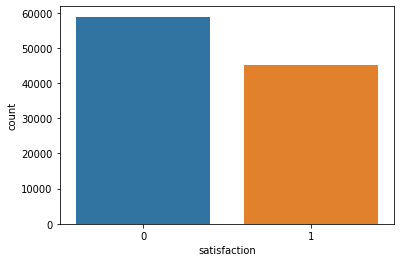

In [10]:
import seaborn as sns 
sns.countplot(x=df.satisfaction)


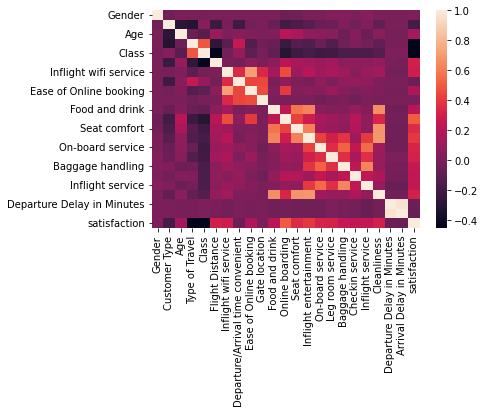

In [11]:
#Matrice de corrélation
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr())
plt.show()

###### => On remarque qu'il ya une corrélation forte entre Departure Delay in minutes and Arrival Delay in minutes, on supprime arrival delay in minutes puisque la colonne contient des valeurs nulls.

In [12]:
df=df.drop("Arrival Delay in Minutes",axis=1)

In [13]:
#train test split: on divise le data et en train and test et y= target x=features
from sklearn.model_selection import train_test_split
X=df.drop("satisfaction",axis=1)
y=df["satisfaction"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

# Classification

# 1er modèle : K-means:


##### Définiton: 

Le partitionnement en k-moyennes est une méthode de partitionnement de données et un problème d'optimisation combinatoire. Étant donnés des points et un entier k, le problème est de diviser les points en k groupes, souvent appelés clusters, de façon à minimiser une certaine fonction.


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
km=KMeans(2,random_state=42)
km.fit(X_train)
y_pred=km.predict(X_test)


print(classification_report(y_test, y_pred))
scores.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.85      0.74     11713
           1       0.67      0.41      0.51      9068

    accuracy                           0.66     20781
   macro avg       0.66      0.63      0.62     20781
weighted avg       0.66      0.66      0.64     20781



Precision = TP/(TP + FP) :  What percent of your predictions were correct

Recall = TP/(TP+FN) : What percent of the positive cases did you catch

F1 Score = 2*(Recall * Precision) / (Recall + Precision) : What percent of positive predictions were correct

Support is the number of actual occurrences of the class in the specified dataset

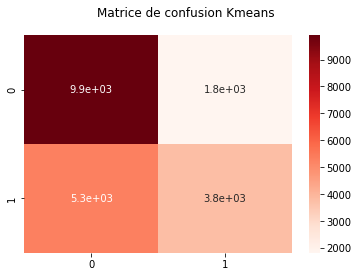

In [15]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred) #matrice de confusion 
plt.suptitle("Matrice de confusion Kmeans")
sns.heatmap(conf_matrix, annot=True,cmap="Reds")
plt.show()

Les prédictions du modèle pour la classe 0 sont réparties comme suit:
* 9899 observations ont été correctement classées dans la classe 0 (vrais négatifs).
* 1814 observations ont été classées à tort dans la classe 1 (faux positifs).
Les prédictions du modèle pour la classe 1 sont réparties comme suit:
* 5310 observations ont été classées à tort dans la classe 0 (faux négatifs).
* 3758 observations ont été correctement classées dans la classe 1 (vrais positifs).

# 2ème modèle : SVM :  Machines à vecteurs supports





###### Définition :

Le principe des SVM consiste à ramener un problème de classification ou de discrimination à un hyperplan (feature space) dans lequel les données sont séparées en plusieurs classes dont la frontière est la plus éloignée possible des points de données (ou "marge maximale")

###### Feature Scaling :
    
La mise à l'échelle des caractéristiques est une méthode utilisée pour normaliser la plage de variables indépendantes ou les caractéristiques des données. En traitement de données, elle est également connue sous le nom de normalisation des données et est généralement effectuée lors de l'étape de prétraitement des données. 
* Juste pour vous donner un exemple - si vous avez plusieurs variables indépendantes comme l'âge, le salaire et la taille ; Avec leur plage de (18 à 100 ans), (25 000 à 75 000 euros) et (1 à 2 mètres) respectivement, la mise à l'échelle des fonctionnalités les aiderait toutes à être dans la même plage, par exemple, centrée autour de 0 ou dans la plage (0,1) selon la technique de mise à l'échelle.
nb: svm ne fonctionne que sur des données normaliser

In [16]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

#feature scaling :
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [24]:

# Training a SVM classifier using SVC class , trouver le meilleur kernel 
kernel=['linear' , 'rbf', 'sigmoid']
score=[]
for k in kernel:
    svm = SVC(kernel= k, random_state=1)
    svm.fit(X_train_std, y_train)
    y_pred=svm.predict(X_test_std)
    # Model performance
    score.append(accuracy_score(y_test, y_pred))
    



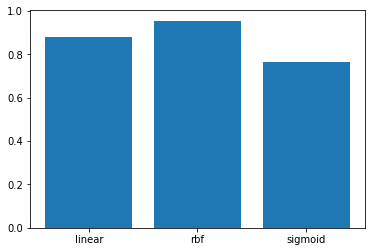

In [25]:
import matplotlib.pyplot as plt
#tracer un bar plot pour determiner le meilleur score
plt.bar(kernel,score)
plt.show()

In [30]:
scores.append(score[1]) #car rbf est le mieux adapté 

# 3ème modèle : Perceptron multi-couches

###### Définiton:

Le perceptron multicouche ou PMC est un réseau neuronal organisé en plusieurs couches au sein desquelles une information circule de la couche d’entrée vers la couche de sortie. Il s’agit donc d’une architecture de réseau sans boucle, dite à propagation directe (feedforward).

Chaque couche est constituée d’un nombre variable de neurones, les neurones de la dernière couche (dite « de sortie ») étant les sorties du réseau global.



In [32]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
#solver: the solver for weight optimazation , lbfgs car il fonctionne mieux sur les petits dataset (converge plus rapidement et meilleure performance)
#hidden layer sizes : nombre de couche et nombre de neurones
clf.fit(X_train_std,y_train)  
y_pred=clf.predict(X_test_std)
print(classification_report(y_test, y_pred))
scores.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11713
           1       0.94      0.91      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.93      0.93     20781
weighted avg       0.94      0.94      0.94     20781



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


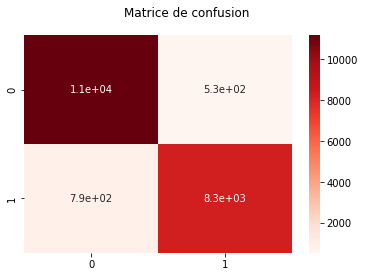

In [33]:
#matrice de confusion
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
plt.suptitle("Matrice de confusion")
sns.heatmap(conf_mat, annot=True,cmap="Reds")
plt.show()

Les prédictions du modèle pour la classe 0 sont réparties comme suit:
* 11 179 observations ont été correctement classées dans la classe 0 (vrais négatifs).
* 534 observations ont été classées à tort dans la classe 1 (faux positifs).
Les prédictions du modèle pour la classe 1 sont réparties comme suit:
* 789 observations ont été classées à tort dans la classe 0 (faux négatifs).
* 8 279 observations ont été correctement classées dans la classe 1 (vrais positifs).

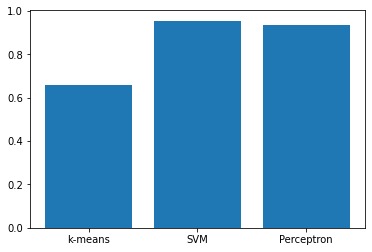

In [34]:
#tracer un bar plot pour determiner le meilleur modèle
plt.bar(models,scores)
plt.show()

=> SVM(rbf) est le mieux adapté pour la classification 

In [35]:
for i in range(3):
    print(models[i],": ",scores[i])

k-means :  0.6571868533756797
SVM :  0.9553919445647466
Perceptron :  0.9361917135845244
